# Neuro

In [1]:
%load_ext autoreload
%load_ext autotime

import os
import glob
import random
import sys
import math
# import from absolute directory
srcdir = '/Users/pengzhizhang/cellDancer/src'
sys.path.append(srcdir)

import matplotlib.pyplot as plt
import pandas as pd

time: 1.77 s (started: 2022-05-19 23:33:21 -05:00)


In [2]:
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap
from celldancer import velocity_estimation
from celldancer.compute_cell_velocity import compute_cell_velocity
from celldancer.pseudo_time import pseudo_time

time: 26.1 s (started: 2022-05-19 23:33:23 -05:00)


## Set Parameters

In [3]:
n_neighbors=200
downsample_step=(60,60)

time: 756 µs (started: 2022-05-19 23:33:49 -05:00)


## Load detail

In [4]:
detail_result_path = '/Users/pengzhizhang/pseudotime/data/neuro/velocity_result'
output_path = os.getcwd()
detail_file = os.path.join(detail_result_path,'combined_detail.csv')
load_cellDancer=pd.read_csv(detail_file)

time: 1min 35s (started: 2022-05-19 23:33:49 -05:00)


## Visualize gene velocity

In [5]:
xlim = (-25, 30)
ylim = (-25, 30)

time: 6.3 ms (started: 2022-05-19 23:35:25 -05:00)


In [126]:

%%capture
%autoreload 2

gene_choice=list(set(load_cellDancer.gene_name))
load_cellDancer = compute_cell_velocity(
    load_cellDancer=load_cellDancer,
    gene_list=gene_choice,
    mode="embedding",
    transfer_mode=None,
    n_neighbors=n_neighbors,
    step=downsample_step)

KeyboardInterrupt: 

time: 1min 25s (started: 2022-05-20 14:51:09 -05:00)


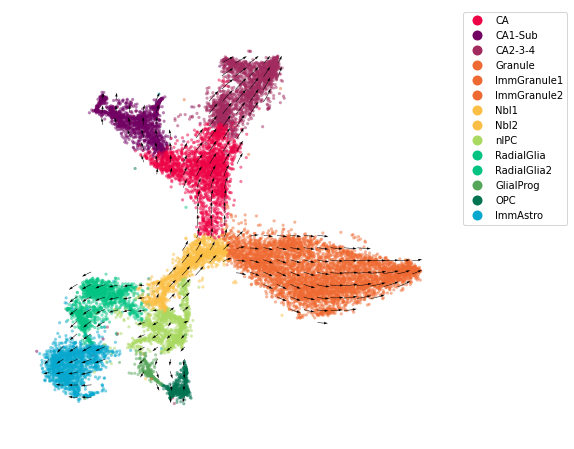

time: 14.3 s (started: 2022-05-19 23:37:52 -05:00)


In [8]:
%autoreload 2

fig, ax = plt.subplots(figsize=(8,8))
im = cdplt.cell.scatter_cell(ax, load_cellDancer, colors=colormap.colormap_neuro, alpha=0.5, s=10,
             gene_name=None, velocity=True, custom_xlim=xlim, custom_ylim=ylim, legend='on')
ax.axis('off')
plt.show()

In [ ]:
gene_list=['Dcx','Rimbp2','Dctn3','Psd3','Ntrk2',
           'Pfkp','Gnao1','Ncald','Klf7','Slc4a10',
           'Nav1','Elavl4','Gpc6','Cdh13','Ppfia2']


ncols=5
fig = plt.figure(figsize=(20,12))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

In [ ]:
%autoreload 2

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
gene = 'Dcx'
im0=cdplt.cell.scatter_cell(ax[0],load_cellDancer, colors='unspliced', 
             gene_name=gene, velocity=False, custom_xlim=xlim, custom_ylim=ylim, colorbar='on')
im1=cdplt.cell.scatter_cell(ax[1],load_cellDancer, colors='spliced', 
             gene_name=gene, velocity=False, custom_xlim=xlim, custom_ylim=ylim, colorbar='off')

ax[0].axis('off')
ax[1].axis('off')
ax[0].set_title('unspliced:'+gene)
ax[1].set_title('spliced:'+gene)
plt.tight_layout()
plt.show()

In [ ]:
fig, ax = plt.subplots(ncols=3, figsize=(15,5))
gene = 'Dcx'
im0=cdplt.cell.scatter_cell(ax[0],load_cellDancer, colors='alpha', 
             gene_name=gene, velocity=False, custom_xlim=xlim, custom_ylim=ylim)
im1=cdplt.cell.scatter_cell(ax[1],load_cellDancer, colors='beta', 
             gene_name=gene, velocity=False, alpha=0.2, custom_xlim=xlim, custom_ylim=ylim)
im2=cdplt.cell.scatter_cell(ax[2],load_cellDancer, colors='gamma', 
             gene_name=gene, velocity=False, alpha=0.2, custom_xlim=xlim, custom_ylim=ylim)
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
ax[0].set_title('alpha-'+gene)
ax[1].set_title('beta-'+gene)
ax[2].set_title('gamma-'+gene)
plt.tight_layout()
plt.show()

## Estimate pseudotime

Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8920/8920 [02:35<00:00, 57.26it/s]


use path_similarity:  0.1796875
There are 5 clusters.
[0 1 2 3 5]


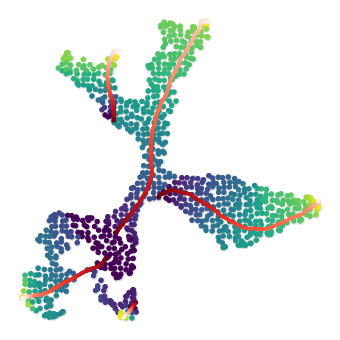




Cluster  0
Total cells in the cluster:  365
MAX allowed zero time cells:  18
MAX allowed terminal cells:  18
Only  1  terminal cells left.
[600]
67  zero cells left.
Sample trajs for zero-time cells in cluster  0   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  0
Total cells in the cluster:  67
MAX allowed zero time cells:  18
MAX allowed terminal cells:  18
Only  1  terminal cells left.
[284]
34  zero cells left.
Sample trajs for zero-time cells in cluster  0   ...
Pseudo random numbers seeds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]



Cluster  0
Total cells in the cluster:  34
MAX allowed zero time cells:  18
MAX allowed terminal cells:  18
Only  3  zero cells left. 
[475, 537, 873]
Only  1  terminal cells left.
[547]
number of paths:  3 3

Display reference paths for cluster 0


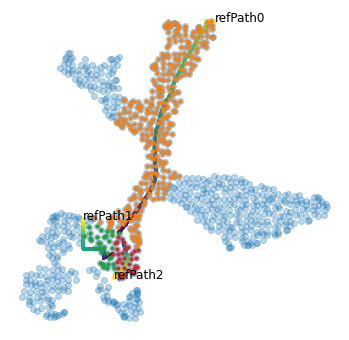


intercluster cell time adjustment
number of cells:  365
Cutoff is  0.04490879428486197
Number of nodes:  3
clusterIDs:  [0, 1, 2]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (291, 759)
pair_cellIDs:  (405, 284)
pair_cellIDs:  (528, 509)
pair_cellIDs:  (496, 254)
pair_cellIDs:  (212, 343)
pair_cellIDs:  (96, 807)

Peak mode:  most_frequent_shift


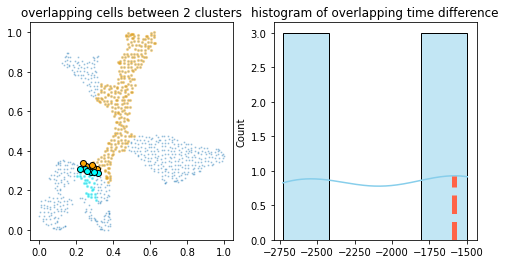

Time shift is:  -1557
The overlapping cells are: 
cell  291  from cluster  0  and  759  from cluster  1

Consolidating time between clusters  0  and  2 ...
pair_cellIDs:  (535, 762)
pair_cellIDs:  (746, 868)
pair_cellIDs:  (379, 280)
pair_cellIDs:  (725, 826)
pair_cellIDs:  (528, 484)
pair_cellIDs:  (886, 475)

Peak mode:  most_frequent_shift


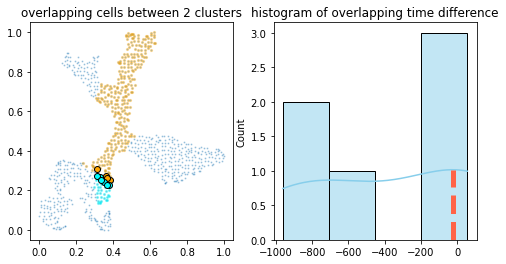

Time shift is:  0
The overlapping cells are: 
cell  725  from cluster  0  and  826  from cluster  2

Consolidating time between clusters  1  and  2 ...
pair_cellIDs:  (258, 735)
pair_cellIDs:  (505, 591)
pair_cellIDs:  (142, 70)
pair_cellIDs:  (680, 589)
pair_cellIDs:  (509, 484)
pair_cellIDs:  (592, 544)
pair_cellIDs:  (692, 873)
pair_cellIDs:  (409, 537)
pair_cellIDs:  (700, 119)
pair_cellIDs:  (728, 479)
pair_cellIDs:  (254, 826)

Peak mode:  most_frequent_shift


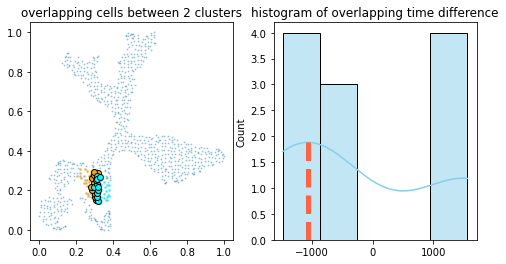

Time shift is:  -1165
The overlapping cells are: 
cell  700  from cluster  1  and  119  from cluster  2


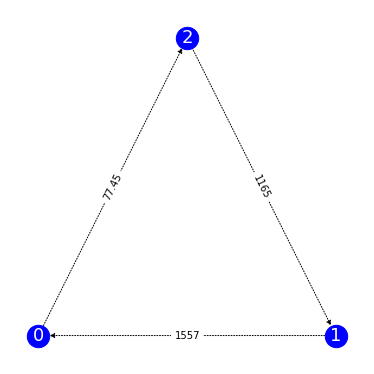

Connected components:  {0, 1, 2}
All nodes adjustment:  {0: 0, 1: -1557, 2: -2722}



Cluster  1
Total cells in the cluster:  261
MAX allowed zero time cells:  13
MAX allowed terminal cells:  13
Only  0  zero cells left. 
[]
Only  1  terminal cells left.
[792]
number of paths:  1 1

Display reference paths for cluster 1


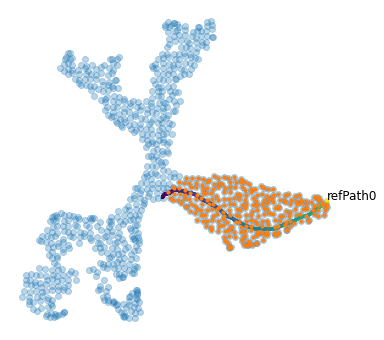




Cluster  2
Total cells in the cluster:  174
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  0  zero cells left. 
[]
Only  1  terminal cells left.
[761]
number of paths:  1 1

Display reference paths for cluster 2


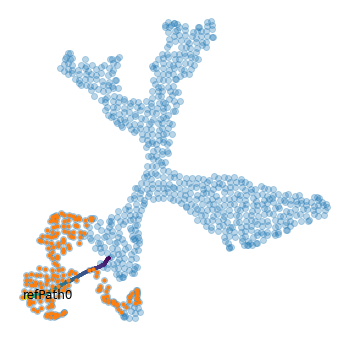




Cluster  3
Total cells in the cluster:  80
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  0  zero cells left. 
[]
Only  1  terminal cells left.
[668]
number of paths:  1 1

Display reference paths for cluster 3


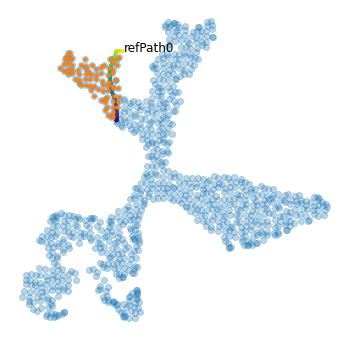




Cluster  5
Total cells in the cluster:  12
MAX allowed zero time cells:  10
MAX allowed terminal cells:  10
Only  0  zero cells left. 
[]
Only  2  terminal cells left.
[670, 854]
number of paths:  1 1

Display reference paths for cluster 5


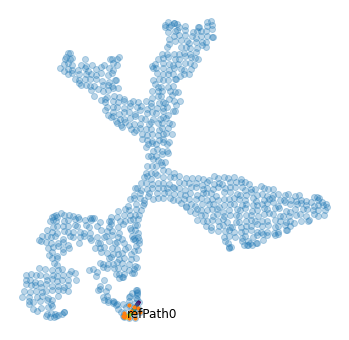




All intra cluster cell time has been resolved.




intercluster cell time adjustment
number of cells:  892
Cutoff is  0.0504658367032499
Number of nodes:  5
clusterIDs:  [0, 1, 2, 3, 5]

Consolidating time between clusters  0  and  1 ...
pair_cellIDs:  (63, 747)
pair_cellIDs:  (110, 870)
pair_cellIDs:  (134, 876)
pair_cellIDs:  (55, 487)
pair_cellIDs:  (290, 803)
pair_cellIDs:  (705, 816)
pair_cellIDs:  (368, 281)
pair_cellIDs:  (820, 371)
pair_cellIDs:  (523, 269)

Peak mode:  most_frequent_shift


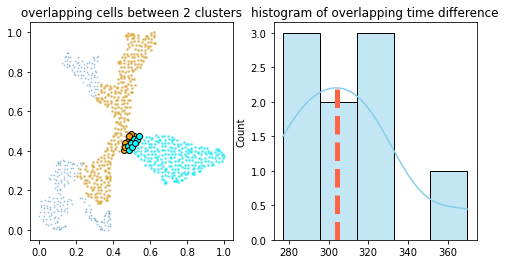

Time shift is:  306
The overlapping cells are: 
cell  820  from cluster  0  and  371  from cluster  1

Consolidating time between clusters  0  and  2 ...
pair_cellIDs:  (212, 729)
pair_cellIDs:  (343, 320)
pair_cellIDs:  (215, 663)
pair_cellIDs:  (313, 393)
pair_cellIDs:  (284, 205)
pair_cellIDs:  (169, 40)
pair_cellIDs:  (345, 811)
pair_cellIDs:  (209, 104)
pair_cellIDs:  (405, 141)
pair_cellIDs:  (806, 412)
pair_cellIDs:  (716, 309)
pair_cellIDs:  (642, 95)
pair_cellIDs:  (547, 325)

Peak mode:  most_frequent_shift


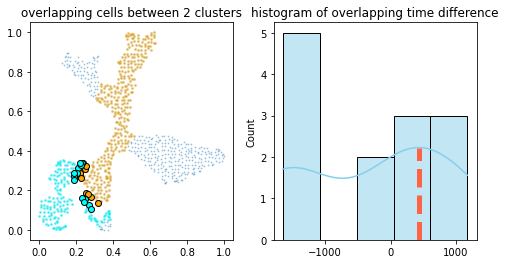

Time shift is:  588
The overlapping cells are: 
cell  215  from cluster  0  and  663  from cluster  2

Consolidating time between clusters  0  and  3 ...
pair_cellIDs:  (75, 296)
pair_cellIDs:  (190, 613)
pair_cellIDs:  (367, 300)
pair_cellIDs:  (279, 11)
pair_cellIDs:  (231, 252)
pair_cellIDs:  (31, 172)
pair_cellIDs:  (377, 264)
pair_cellIDs:  (109, 386)

Peak mode:  most_frequent_shift


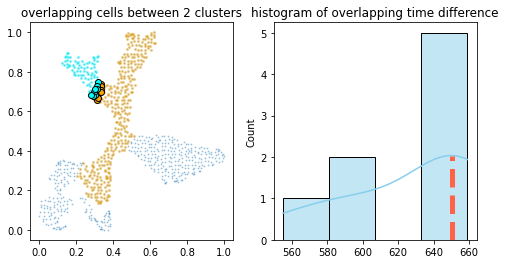

Time shift is:  646
The overlapping cells are: 
cell  279  from cluster  0  and  11  from cluster  3

Consolidating time between clusters  0  and  5 ...
No close cells between clusters	 (0, 5)

Consolidating time between clusters  1  and  2 ...
No close cells between clusters	 (1, 2)

Consolidating time between clusters  1  and  3 ...
No close cells between clusters	 (1, 3)

Consolidating time between clusters  1  and  5 ...
No close cells between clusters	 (1, 5)

Consolidating time between clusters  2  and  3 ...
No close cells between clusters	 (2, 3)

Consolidating time between clusters  2  and  5 ...
pair_cellIDs:  (797, 715)
pair_cellIDs:  (446, 749)
pair_cellIDs:  (288, 586)
pair_cellIDs:  (196, 156)
pair_cellIDs:  (677, 854)
pair_cellIDs:  (144, 419)
pair_cellIDs:  (306, 38)
pair_cellIDs:  (786, 607)
pair_cellIDs:  (401, 670)
pair_cellIDs:  (594, 858)

Peak mode:  most_frequent_shift


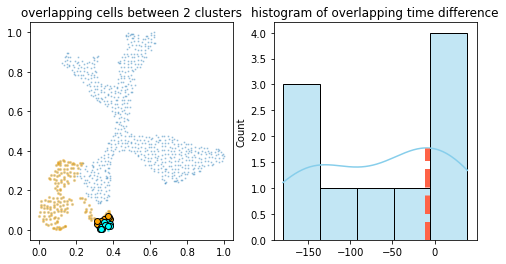

Time shift is:  0
The overlapping cells are: 
cell  786  from cluster  2  and  607  from cluster  5

Consolidating time between clusters  3  and  5 ...
No close cells between clusters	 (3, 5)


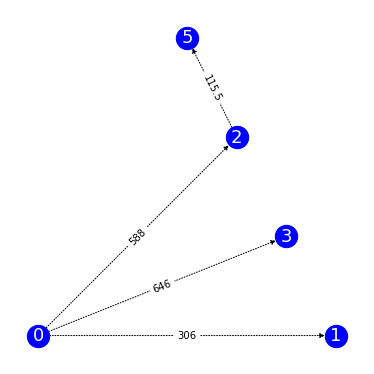

Connected components:  {0, 1, 2, 3, 5}
All nodes adjustment:  {0: 0, 1: 306, 2: 588, 3: 646, 5: 588}


All inter cluster cell time has been resolved.



There are 18140 cells.


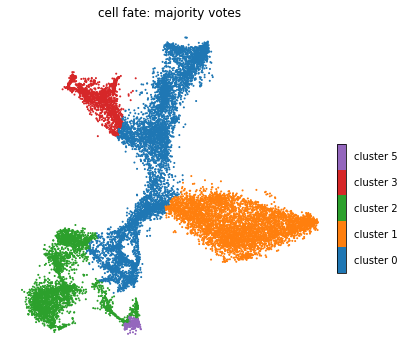

--- 408.30972695350647 seconds ---
time: 6min 49s (started: 2022-05-19 23:38:21 -05:00)


In [9]:
%autoreload 2

dt = 0.001
t_total = {0.001: 10000}
n_repeats = 10

grid = (30, 30)
load_cellDancer = pseudo_time(
    load_cellDancer=load_cellDancer, 
    grid=grid, 
    dt=dt, 
    t_total=t_total[dt], 
    n_repeats=n_repeats, 
    downsample_step=downsample_step,
    n_paths = 5,
    psrng_seeds_diffusion=[i for i in range(n_repeats)],
    activate_umap_paths_divider=False,
    n_jobs=12)

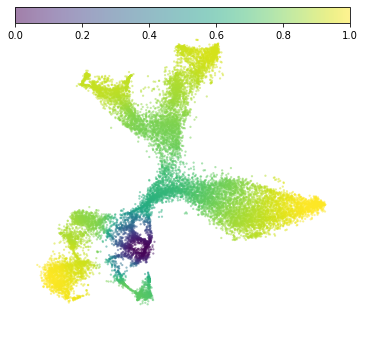

time: 12.5 s (started: 2022-05-19 23:46:49 -05:00)


In [10]:
fig, ax = plt.subplots(figsize=(6,6))
im=cdplt.cell.scatter_cell(ax,load_cellDancer, colors='pseudotime', alpha=0.5, 
             gene_name=None, velocity=False, custom_xlim=(-25,30), custom_ylim=(-25,30))
ax.axis('off')
plt.show()
#plt.savefig("neuro_pseudo_time.pdf")

In [ ]:
gene_list=['Dcx','Rimbp2','Dctn3','Psd3','Ntrk2',
           'Pfkp','Gnao1','Ncald','Klf7','Slc4a10',
           'Nav1','Elavl4','Gpc6','Cdh13','Ppfia2']


ncols=5
fig = plt.figure(figsize=(20,12))


for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='spliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_neuro,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene_name=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')
#plt.savefig("neuro_gene_spliced_vs_pseudotime.pdf")


## Graph representation of the cell fates


In [145]:
%autoreload 2
from celldancer.plotting import _graph
graph = _graph.graph(load_cellDancer)

time: 2min 35s (started: 2022-05-20 17:56:05 -05:00)


In [146]:
graph

:DynamicMap   []
   :Overlay
      .RGB.I   :RGB   [x,y]   (R,G,B,A)
      .Nodes.I :Nodes   [x,y,index]   (ptime,clusters)

time: 412 ms (started: 2022-05-20 18:13:32 -05:00)
